In [6]:
import ondemand

od = ondemand.OnDemandClient(api_key='0adbf00b462c1acca954a43d94279b92')

# or if you are using a free sandbox API

od = ondemand.OnDemandClient(api_key='0adbf00b462c1acca954a43d94279b92', end_point='https://marketdata.websol.barchart.com/')

# get quote data for Apple and Microsoft
quotes = od.quote('AAPL,MSFT')['results']

for q in quotes:
    print('Symbol: %s, Last Price: %s' % (q['symbol'], q['lastPrice']))
          
# get 1 minutes bars for Apple
resp = od.history('AAPL', 'minutes', maxRecords=50, interval=1)


# generic request by API name
resp = od.get('getQuote', symbols='AAPL,EXC', fields='bid,ask')


Barchart OnDemand Client: https://ondemand.websol.barchart.com/
Barchart OnDemand Client: https://marketdata.websol.barchart.com/
Symbol: AAPL, Last Price: 224.29
Symbol: MSFT, Last Price: 112.13


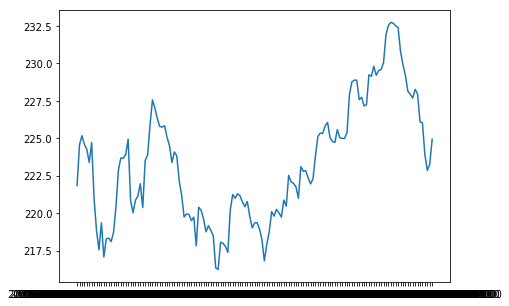

        close      high       low      open symbol                  timestamp  \
0    224.5660  224.7600  221.5400  221.8500   AAPL  2018-09-07T09:00:00-04:00   
1    225.1699  225.2224  224.2000  224.5700   AAPL  2018-09-07T10:00:00-04:00   
2    224.5950  225.3700  224.4500  225.1800   AAPL  2018-09-07T11:00:00-04:00   
3    224.2750  224.6540  222.7810  224.5947   AAPL  2018-09-07T12:00:00-04:00   
4    223.4000  224.3400  223.1100  224.2730   AAPL  2018-09-07T13:00:00-04:00   
5    224.7200  224.7400  223.3700  223.3900   AAPL  2018-09-07T14:00:00-04:00   
6    221.4200  224.8400  220.7100  224.7100   AAPL  2018-09-07T15:00:00-04:00   
7    218.8100  221.8500  217.2260  220.9500   AAPL  2018-09-10T09:00:00-04:00   
8    217.5600  219.1700  216.4700  218.8400   AAPL  2018-09-10T10:00:00-04:00   
9    219.3600  219.5100  217.0600  217.5600   AAPL  2018-09-10T11:00:00-04:00   
10   217.0950  219.3700  216.8100  219.3650   AAPL  2018-09-10T12:00:00-04:00   
11   218.3000  218.4300  217

In [7]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

#od.history('AAPL', 'minutes', startDate='20180101', maxRecords='1', interval='60', order='asc', sessionFilter='EFK', splits='true', dividends='true', volume='sum', nearby='1', jerq='true', exchange='NYSE,AMEX,NASDAQ', backAdjust='false', daysToExpiration='1', contractRoll='expiration')

data = od.get('getHistory', symbol='AAPL',type='minutes', interval='60', startDate=20101001, endDate=20181001)


normalizedData = json_normalize(data['results'])

pricePerTime = normalizedData['open']
timeStamp = normalizedData['timestamp']

fig = plt.figure(figsize=(7,5))
ax = plt.axes()
ax.plot(timeStamp,pricePerTime)
#plt.ylim(225, 230)
plt.show()
print(normalizedData)

#export_csv = df.to_csv (r'/Users/jamesgalante/Desktop/dt.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path